[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/davemlz/eemont/blob/master/docs/tutorials/034-eemont-and-julia.ipynb)
[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/davemlz/eemont/blob/master/docs/tutorials/034-eemont-and-julia.ipynb)
[![Open in Planetary Computer](https://img.shields.io/badge/Open-Planetary%20Computer-black?style=flat&logo=microsoft)](https://pccompute.westeurope.cloudapp.azure.com/compute/hub/user-redirect/git-pull?repo=https://github.com/davemlz/eemont&urlpath=lab/tree/eemont/docs/tutorials/034-eemont-and-julia.ipynb&branch=master)

# Using eemont in Julia

_Tutorial created by **David Montero Loaiza**_: [GitHub](https://github.com/davemlz) | [Twitter](https://twitter.com/dmlmont)

- GitHub Repo: [https://github.com/davemlz/eemont](https://github.com/davemlz/eemont)
- PyPI link: [https://pypi.org/project/eemont/](https://pypi.org/project/eemont/)
- Conda-forge: [https://anaconda.org/conda-forge/eemont](https://anaconda.org/conda-forge/eemont)
- Documentation: [https://eemont.readthedocs.io/](https://eemont.readthedocs.io/)
- More tutorials: [https://github.com/davemlz/eemont/tree/master/docs/tutorials](https://github.com/davemlz/eemont/tree/master/docs/tutorials)

## Let's start!

If required, please uncomment:

In [ ]:
# using Pkg
# Pkg.add("Plots")
# Pkg.add("FileIO")
# Pkg.add("PyCall")
# Pkg.add("Conda")

# using Conda
# Conda.add("earthengine-api", channel="conda-forge");

# Pkg.add("EarthEngine")

First, let's import everything we need!

We are going to use the amazing [EarthEngine.jl](https://docs.juliahub.com/EarthEngine/jof0K/0.3.2/index.html) package, created by [Kel Markert](https://github.com/KMarkert), to work with Google Earth Engine in Julia!

In [1]:
using Plots, FileIO, PyCall
using EarthEngine

Now, to use `eemont`, we need a trick. Since there is no `eemont.jl` (at least not yet), we will call it from Python directly, that's why we are using PyCall here.

In [2]:
eemont = pyimport("eemont");

Let's initialize Earth Engine!

In [ ]:
Initialize()

Now, let's create a simple ROI:

In [4]:
geometry = Point(27.719481, 26.478555) |> x -> buffer(x,3500);

And since we are going to plot some spectral indices, let's define our color palette!

In [13]:
palette = ["FFFFFF", "CE7E45", "DF923D", "F1B555", "FCD163", "99B718",
           "74A901", "66A000", "529400", "3E8601", "207401", "056201",
           "004C00", "023B01", "012E01", "011D01", "011301"];

## Working with Earth Engine in Julia

The cool part is coming! With `EarthEngine.jl` you can use the Julia syntax for Earth Engine! Let's get the first image of Sentinel-2 L2A and clip it:

In [11]:
img = clipToBoundsAndScale(first(EE.ImageCollection("COPERNICUS/S2_SR")),geometry,scale = 10);

## Adding `eemont` to the soup

We know that `eemont` extends the Earth Engine classes with new methods and stuff. And since `EarthEngine.jl` helps you with the Julia syntax, now all `eemont` methods work like that too!

So, let's mask clouds, scale and offset the image and compute the NDVI there!

In [14]:
idx = spectralIndices(scaleAndOffset(maskClouds(img)),"NDVI");

Now, let's get a thumbnail for visualization!

In [15]:
thumburl = getThumbUrl(
    select(idx,"NDVI"),
    Dict(
        "min" => 0,
        "max" => 1.0,
        "palette" => palette,
        "format" => "png",
    )
)

And don't forget to download it!

In [15]:
localpath = download(thumburl);

And for the finale, the visualization of the NDVI!

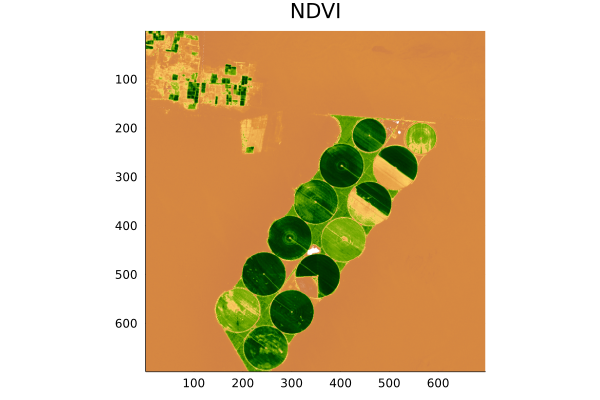

In [16]:
plot(FileIO.load(localpath),title = "NDVI")

## Pipes, pipes, pipes

If you're more comfortable using pipes in Julia, you can also use them here!

Let's do all the preprocessing but now with pipes and computing the kNDVI instead of the NDVI:

In [17]:
idx = EE.ImageCollection("COPERNICUS/S2_SR") |>
    first |> 
    x -> clipToBoundsAndScale(x, geometry, scale = 10) |>
    maskClouds |> 
    scaleAndOffset |> 
    x -> spectralIndices(x, "kNDVI");

And that's it! Super easy! Let's get our thumbnail!

In [18]:
thumburl = getThumbUrl(
    select(idx,"kNDVI"),
    Dict(
        "min" => 0,
        "max" => 1.0,
        "palette" => palette,
        "format" => "png",
    )
)

localpath = download(thumburl);

And visualize it!

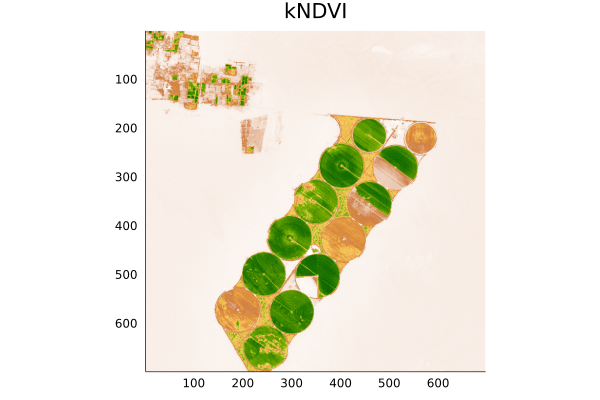

In [19]:
plot(FileIO.load(localpath),title = "kNDVI")

Amazing! :D